In [121]:
import pandas
from random import seed, randint,choice
import numpy as np, numpy.random
import matplotlib.pyplot as pltf
import operator

In [122]:
businessList=[]
j=0
seed(1)
categories =  ['Clothing','Household','Sports','Grocery','Entertainment']
area = ['California','New York']
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
while(j<1000):
    tempList=[]
    distributionTempList=[]
    selection = choice(categories)
    tempList.append(selection)
    selection = choice(area)
    tempList.append(selection)
    seed(j)
    for _ in range(12):
        tempList.append(randint(0, 100)+randint(0,1000)*randint(0,10))
        
    distributionTempList=np.random.dirichlet(np.ones(5),size=1)*100
    for index, value in np.ndenumerate(distributionTempList):
        if(selection == 'California'):
            if(index[1] == 4 ):
                value=abs(value+30)
            elif(index[1] == 3):
                value=abs(value-30)
        else:
            if(index[1] == 4 ):
                 value=abs(value-30)
            elif(index[1] == 3):
                 value=abs(value+30)
        tempList.append(round(float(value),2))
            

    businessList.append(tempList)
    j=j+1

In [123]:
dataFrame=pandas.DataFrame(businessList,columns=['Category','Region','January','February','March','April','May','June','July','August','September','October','November','December','Miscellaneous','Workforce','Supplies','Maintenance','Marketing'])
dataFrame

,Category,Region,January,February,March,April,May,June,July,August,September,October,November,December,Miscellaneous,Workforce,Supplies,Maintenance,Marketing
0,Household,California,4705,2125,1718,3355,1059,179,3351,6566,335,843,3906,2184,15.88,15.74,12.77,5.96,49.65
1,Sports,California,599,872,3317,1247,12,4036,97,1913,2555,1042,40,5323,7.17,3.48,1.91,30.39,57.05
2,Clothing,New York,100,1756,8374,2352,27,1468,3973,7132,3946,64,2607,5614,45.55,28.16,0.92,33.70,8.33
3,Grocery,California,4878,3418,5820,8,2180,1401,6917,4120,2389,7123,49,880,1.46,30.82,38.62,28.58,57.68
4,Household,California,340,2927,111,3290,37,4284,612,817,8483,3309,696,3247,18.73,21.50,44.78,26.11,41.10
5,Clothing,New York,1384,9738,270,2994,189,2674,3143,1774,2245,624,894,913,14.94,18.01,10.12,74.28,17.35
6,Household,New York,914,3182,4,4284,3857,40,1534,5451,5588,1785,2934,7482,22.11,23.45,12.93,65.56,24.04
7,Clothing,New York,1981,50,6729,3378,7455,65,483,766,594,2925,5858,5317,47.27,4.29,24.97,50.24,26.78
8,Grocery,California,2303,16,430,1348,299,2846,1821,688,29,2273,2962,1252,22.28,4.11,14.85,14.11,44.65
9,Sports,California,3194,316,116,4330,2746,78,869,6866,956,21,1094,459,28.50,35.29,18.14,21.84,39.91


In [124]:
dataframe2=dataFrame.groupby(['Category','Region'],as_index=False).median()
dataframe2=dataframe2.loc[dataframe2['Category']=='Clothing']
dataframe2

,Category,Region,January,February,March,April,May,June,July,August,September,October,November,December,Miscellaneous,Workforce,Supplies,Maintenance,Marketing
0,Clothing,California,1746.0,2009.0,2730.0,2133.0,2306.0,1845.0,2050.0,1762.0,1814.0,1657.0,2245.0,2053.0,12.90,19.82,13.95,15.02,48.97
1,Clothing,New York,1950.0,1198.0,1546.0,1840.0,2533.0,1985.0,2256.0,1631.0,2488.0,1419.0,2042.0,2148.0,17.77,15.29,15.65,44.98,16.71


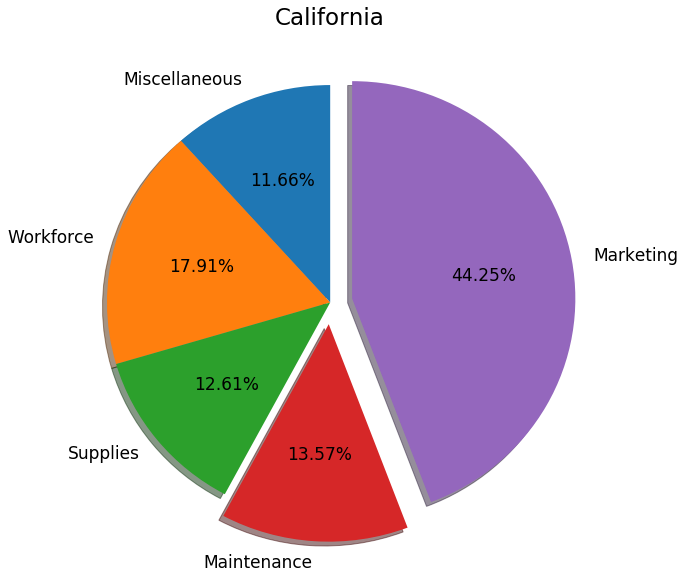

In [125]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
distribution = ['Miscellaneous','Workforce','Supplies','Maintenance','Marketing']
labels = distribution
#data from above cell
sizes = list(dataframe2.iloc[0,-5:])
explode = (0.0, 0.0, 0.0, 0.1,0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90,textprops={'fontsize': 17})
  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.rcParams["figure.figsize"] = (10,10)
plt.title("California",{'fontsize': 23})
#ax1.axis('equal')
plt.show()



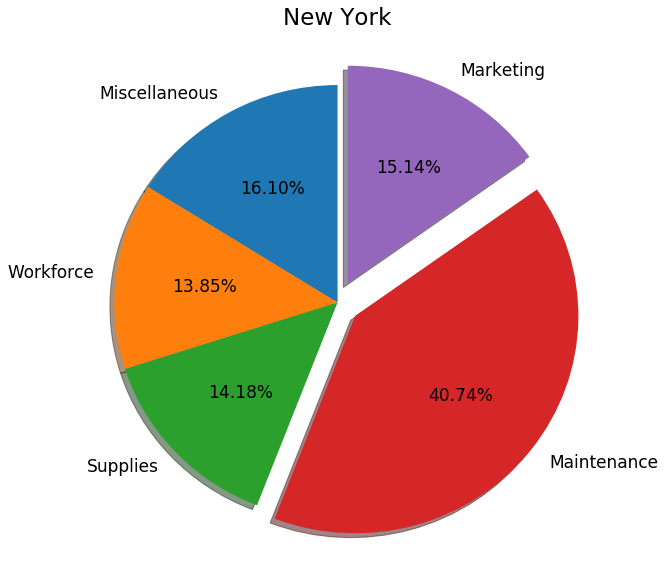

In [126]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
distribution = ['Miscellaneous','Workforce','Supplies','Maintenance','Marketing']
labels = distribution
#data from above cell
sizes = list(dataframe2.iloc[1,-5:])
explode = (0.0, 0.0, 0.0, 0.1,0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90,textprops={'fontsize': 17})
  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.rcParams["figure.figsize"] = (10,10)
#ax1.axis('equal')
plt.title("New York",{'fontsize': 23})
plt.show()

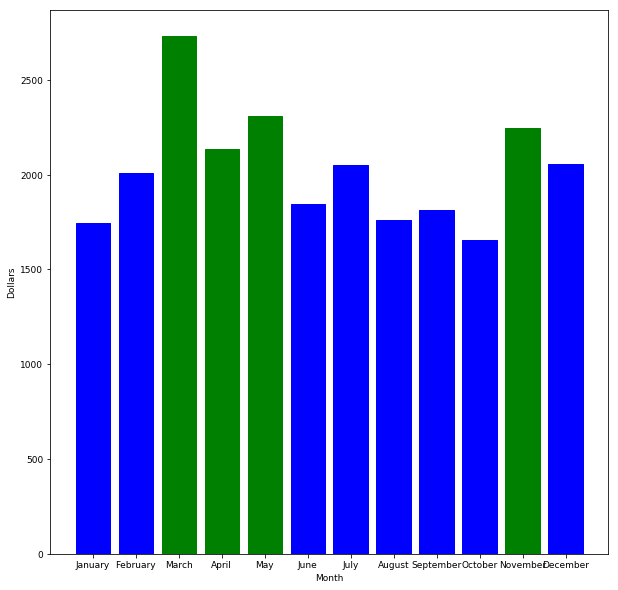

In [159]:
values = list(dataframe2.iloc[0,2:14])
x = np.arange(12)
fig, ax = plt.subplots()
top_4_idx = np.argsort(values)[-4:]
barvalues=plt.bar(x, values)
for i in range(0,12):
    barvalues[i].set_color('b')
for v in top_4_idx:
    barvalues[v].set_color('g')

plt.xticks(x,months)
plt.xlabel('Month')
plt.ylabel('Dollars')
plt.show()

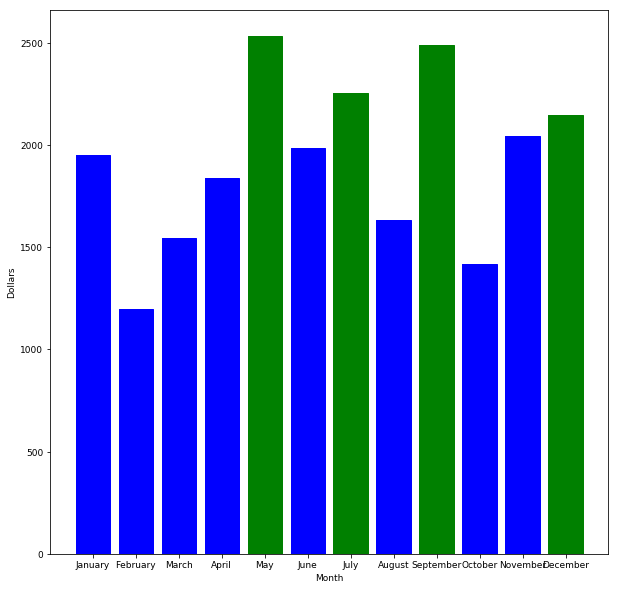

In [160]:
values = list(dataframe2.iloc[1,2:14])
x = np.arange(12)
fig, ax = plt.subplots()

plt.bar(x, values)
top_4_idx = np.argsort(values)[-4:]
barvalues=plt.bar(x, values)
for i in range(0,12):
    barvalues[i].set_color('b')
for v in top_4_idx:
    barvalues[v].set_color('g')
plt.xticks(x,months)
plt.xlabel('Month')
plt.ylabel('Dollars')
plt.show()